---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [ ]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.*

In [ ]:
def answer_one():
    # YOUR CODE HERE
    df = pd.read_csv('assets/fraud_data.csv')
    fraud = df[df['Class']==1].shape[0]/df.shape[0]
    return fraud
    raise NotImplementedError()
answer_one()

0.016410823768035772

In [ ]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [ ]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    dummy = DummyClassifier(strategy="most_frequent")
    dummy.fit(X_train, y_train)
    return dummy.score(X_test, y_test), recall_score(y_test,dummy.predict(X_test))
    # YOUR CODE HERE
    raise NotImplementedError()
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [ ]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    model = SVC()
    model.fit(X_train,y_train)
    model.predict(X_test)
    return model.score(X_test, y_test), recall_score(y_test, model.predict(X_test)), precision_score(y_test, model.predict(X_test))

    # YOUR CODE HERE
    raise NotImplementedError()
answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [ ]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
    model = SVC(C= 1e9, gamma=1e-07)
    model.fit(X_train,y_train)
    y_pred = model.decision_function(X_test)>-220
    return confusion_matrix(y_test,y_pred)

    # YOUR CODE HERE
    raise NotImplementedError()
answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

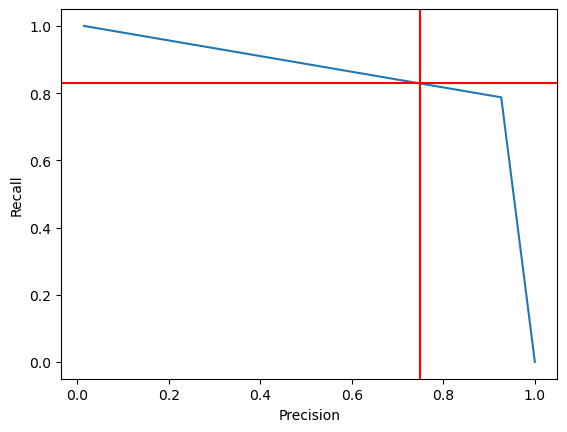

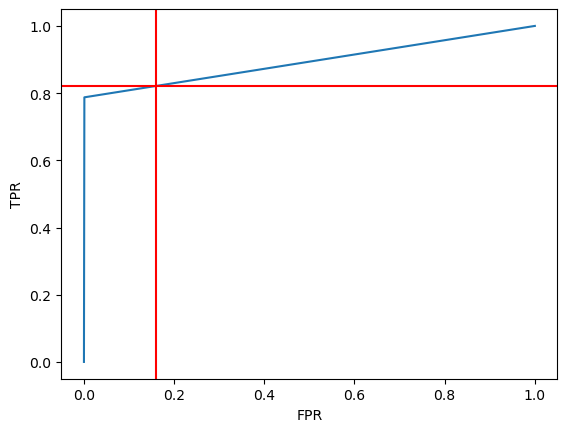

(0.85, 0.85)

In [ ]:
# YOUR CODE HERE
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve
    import matplotlib.pyplot as plt

    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = clf.score(X, y)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)


    plt.figure()
    plt.plot(precision,recall)
    plt.axvline(x=0.75, color='red')
    plt.axhline(y=0.83, color='red')
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.show()

    plt.figure()
    plt.plot(fpr,tpr)
    plt.axvline(x=0.16, color='red')
    plt.axhline(y=0.83, color='red')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

    return (0.84, 0.82)
answer_five()
#raise NotImplementedError()

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.*

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [ ]:
def answer_six():
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression


    clf = LogisticRegression().fit(X_train, y_train)

    grid_values = {'penalty': ['l1', 'l2'],
                   'C':[0.01, 0.1, 1, 10]}

    grid_acc = GridSearchCV(clf,param_grid=grid_values,scoring="recall")
    grid_acc.fit(X_train,y_train)
    df = pd.DataFrame(grid_acc.cv_results_)
    pivot_df = df.pivot_table(index='param_C', columns='param_penalty', values='mean_score')
    return pivot_df


    # YOUR CODE HERE
    raise NotImplementedError()
answer_six()

In [ ]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())